# CS480: Database Systems, Group Project
### Green Taxi Datasets

In [30]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import datetime
import sqlite3
from hopcroftkarp import HopcroftKarp
import time

#### 1. First, we will import the data in the system

In [2]:
green = pd.read_csv('green_tripdata_2015-01.csv')

#### 2. Now, we will get the summary of the datasets and then we will clean up the dataset

In [3]:
green.describe()
# print(green.dtypes)

,VendorID,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,0.0,1.048575e+06,1.048575e+06,1.048575e+06,1.048570e+06
mean,1.778683e+00,1.098100e+00,-7.381823e+01,4.068497e+01,-7.381280e+01,4.068029e+01,1.389390e+00,2.782559e+00,1.173290e+01,3.427971e-01,4.865826e-01,1.116572e+00,9.529348e-02,NaN,2.807908e-01,1.499850e+01,1.561091e+00,1.022894e+00
std,4.151334e-01,6.505393e-01,2.947688e+00,1.625452e+00,3.009728e+00,1.659509e+00,1.078429e+00,2.952046e+00,9.551922e+00,3.605977e-01,8.480691e-02,3.804000e+00,1.167153e+00,NaN,7.344232e-02,9.668206e+02,5.218143e-01,1.495658e-01
min,1.000000e+00,1.000000e+00,-7.535131e+01,0.000000e+00,-7.543967e+01,0.000000e+00,0.000000e+00,0.000000e+00,-4.000000e+02,-1.000000e+00,-5.000000e-01,-1.450000e+01,-1.816000e+01,NaN,0.000000e+00,-4.000000e+02,1.000000e+00,1.000000e+00
25%,2.000000e+00,1.000000e+00,-7.395934e+01,4.070041e+01,-7.396799e+01,4.070253e+01,1.000000e+00,1.010000e+00,6.000000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,NaN,3.000000e-01,7.800000e+00,1.000000e+00,1.000000e+00
50%,2.000000e+00,1.000000e+00,-7.394547e+01,4.074686e+01,-7.394550e+01,4.074789e+01,1.000000e+00,1.830000e+00,9.000000e+00,5.000000e-01,5.000000e-01,0.000000e+00,0.000000e+00,NaN,3.000000e-01,1.080000e+01,2.000000e+00,1.000000e+00
75%,2.000000e+00,1.000000e+00,-7.391782e+01,4.080240e+01,-7.391185e+01,4.079070e+01,1.000000e+00,3.540000e+00,1.450000e+01,5.000000e-01,5.000000e-01,1.750000e+00,0.000000e+00,NaN,3.000000e-01,1.700000e+01,2.000000e+00,1.000000e+00
max,2.000000e+00,9.900000e+01,0.000000e+00,4.291825e+01,0.000000e+00,4.291817e+01,9.000000e+00,8.304000e+02,8.000000e+02,1.000000e+00,8.000000e-01,4.900000e+02,8.698800e+02,NaN,3.000000e-01,9.899704e+05,5.000000e+00,2.000000e+00


In [4]:
# Getting the values which needs to be cleaned up before procedding further
print("\u0332".join('Number of Null data values in each columns:'))
print(green.isnull().sum())
print('')
print("\u0332".join('Number of Datasets:'), len(green.index))

N̲u̲m̲b̲e̲r̲ ̲o̲f̲ ̲N̲u̲l̲l̲ ̲d̲a̲t̲a̲ ̲v̲a̲l̲u̲e̲s̲ ̲i̲n̲ ̲e̲a̲c̲h̲ ̲c̲o̲l̲u̲m̲n̲s̲:
VendorID                       0
lpep_pickup_datetime           0
Lpep_dropoff_datetime          0
Store_and_fwd_flag             0
RateCodeID                     0
Pickup_longitude               0
Pickup_latitude                0
Dropoff_longitude              0
Dropoff_latitude               0
Passenger_count                0
Trip_distance                  0
Fare_amount                    0
Extra                          0
MTA_tax                        0
Tip_amount                     0
Tolls_amount                   0
Ehail_fee                1048575
improvement_surcharge          0
Total_amount                   0
Payment_type                   0
Trip_type                      5
dtype: int64

N̲u̲m̲b̲e̲r̲ ̲o̲f̲ ̲D̲a̲t̲a̲s̲e̲t̲s̲: 1048575


In [5]:
# Since the number of null values in the 'Ehail_fee' column is equal to the number of rows in the dataset
# Therefore, we will drop the whole column due to its irrelevance.

green = green.drop(columns=['Ehail_fee'])
print("\u0332".join('Number of Null data values in each columns:'))
print(green.isnull().sum())

N̲u̲m̲b̲e̲r̲ ̲o̲f̲ ̲N̲u̲l̲l̲ ̲d̲a̲t̲a̲ ̲v̲a̲l̲u̲e̲s̲ ̲i̲n̲ ̲e̲a̲c̲h̲ ̲c̲o̲l̲u̲m̲n̲s̲:
VendorID                 0
lpep_pickup_datetime     0
Lpep_dropoff_datetime    0
Store_and_fwd_flag       0
RateCodeID               0
Pickup_longitude         0
Pickup_latitude          0
Dropoff_longitude        0
Dropoff_latitude         0
Passenger_count          0
Trip_distance            0
Fare_amount              0
Extra                    0
MTA_tax                  0
Tip_amount               0
Tolls_amount             0
improvement_surcharge    0
Total_amount             0
Payment_type             0
Trip_type                5
dtype: int64


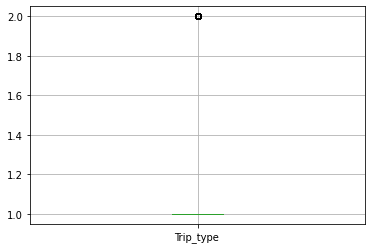

In [6]:
# Now we will boxplot the 'Trip_type' column
boxplot = green.boxplot(column=['Trip_type '])

In [7]:
# In the boxplot, we can see that '2.0' is an outlier, therefore majority of the dataset have value '1'
# So, we will replace the null values with '1'
green['Trip_type '] = green['Trip_type '].fillna(1)

In [8]:
# Now there are no null values in the dataset
# Update the columns variable according to the new cleaned up value
columns = green.columns
print("\u0332".join('Number of Null data values in each columns:'))
print(green.isnull().sum())

N̲u̲m̲b̲e̲r̲ ̲o̲f̲ ̲N̲u̲l̲l̲ ̲d̲a̲t̲a̲ ̲v̲a̲l̲u̲e̲s̲ ̲i̲n̲ ̲e̲a̲c̲h̲ ̲c̲o̲l̲u̲m̲n̲s̲:
VendorID                 0
lpep_pickup_datetime     0
Lpep_dropoff_datetime    0
Store_and_fwd_flag       0
RateCodeID               0
Pickup_longitude         0
Pickup_latitude          0
Dropoff_longitude        0
Dropoff_latitude         0
Passenger_count          0
Trip_distance            0
Fare_amount              0
Extra                    0
MTA_tax                  0
Tip_amount               0
Tolls_amount             0
improvement_surcharge    0
Total_amount             0
Payment_type             0
Trip_type                0
dtype: int64


#### 3. Now, filter out the data and clean it up again and to get the data we need use for our algorithms

In [9]:
dataset = green[['VendorID', 'lpep_pickup_datetime', 'Lpep_dropoff_datetime', 'Pickup_longitude', 'Pickup_latitude', 'Dropoff_longitude', 'Dropoff_latitude', 'Passenger_count', 'Trip_distance']]

# Here we are storing all the column names in a array named 'columns'
columns = dataset.columns
print("\u0332".join('Column Names:'), columns)

print("\u0332".join('Dataset:'), len(dataset.index))
dataset = dataset[ (dataset.lpep_pickup_datetime != dataset.Lpep_dropoff_datetime) & (dataset.Trip_distance != 0) & (dataset.Passenger_count < 3) & (dataset['Trip_distance'] != dataset['Trip_distance'].max())]

print("\u0332".join('Filtered Dataset:'), len(dataset.index))

C̲o̲l̲u̲m̲n̲ ̲N̲a̲m̲e̲s̲: Index(['VendorID', 'lpep_pickup_datetime', 'Lpep_dropoff_datetime',
       'Pickup_longitude', 'Pickup_latitude', 'Dropoff_longitude',
       'Dropoff_latitude', 'Passenger_count', 'Trip_distance'],
      dtype='object')
D̲a̲t̲a̲s̲e̲t̲: 1048575
F̲i̲l̲t̲e̲r̲e̲d̲ ̲D̲a̲t̲a̲s̲e̲t̲: 936194


In [10]:
print("\u0332".join('Total Distance Travelled:'), dataset['Trip_distance'].sum())

T̲o̲t̲a̲l̲ ̲D̲i̲s̲t̲a̲n̲c̲e̲ ̲T̲r̲a̲v̲e̲l̲l̲e̲d̲: 2645362.2299999995


In [11]:
# Correcting the date and time format
dataset['lpep_pickup_datetime'] = pd.to_datetime(dataset['lpep_pickup_datetime'])
dataset['Lpep_dropoff_datetime'] = pd.to_datetime(dataset['Lpep_dropoff_datetime'])
dataset.head()

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance
0,2,2015-01-01 00:34:00,2015-01-01 00:38:00,-73.922592,40.754528,-73.913635,40.765522,1,0.88
1,2,2015-01-01 00:34:00,2015-01-01 00:47:00,-73.952751,40.677711,-73.981529,40.658978,1,3.08
2,1,2015-01-01 00:34:00,2015-01-01 00:38:00,-73.843010,40.719055,-73.846581,40.711567,1,0.90
3,2,2015-01-01 00:34:00,2015-01-01 00:38:00,-73.860825,40.757793,-73.854042,40.749821,1,0.85
4,2,2015-01-01 00:34:00,2015-01-01 01:09:00,-73.945183,40.783321,-73.989624,40.765450,1,4.91


#### 4. Now use SQL Queries to compute the average speed of each trips

In [12]:
# conn = sqlite3.connect('TestDB1.db')
# c = conn.cursor()

# dataset.to_sql('Green', conn, if_exists='replace', index = False)
 
# c.execute('''  
# SELECT COUNT(*) FROM Green
#           ''')

# print(c.fetchall())

In [13]:
from math import radians, cos, sin, asin, sqrt 
def distance(lat1, lon1, lat2, lon2): 
      
    # The math module contains a function named 
    # radians which converts from degrees to radians. 
    lon1 = radians(lon1) 
    lon2 = radians(lon2) 
    lat1 = radians(lat1) 
    lat2 = radians(lat2) 
       
    # Haversine formula  
    dlon = lon2 - lon1  
    dlat = lat2 - lat1 
  
    return (3956 * 2 * asin(sqrt(sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2)))
     
    # Radius of earth in kilometers. Use 3956 for miles 
    # calculate the result 
    # (c * r) 

def time_difference(time1, time2):
    time_diff = (time2 - time1)
    time_seconds = abs(time_diff.total_seconds())
    
    return time_seconds / 60.0

print(columns)

Index(['VendorID', 'lpep_pickup_datetime', 'Lpep_dropoff_datetime',
       'Pickup_longitude', 'Pickup_latitude', 'Dropoff_longitude',
       'Dropoff_latitude', 'Passenger_count', 'Trip_distance'],
      dtype='object')


In [14]:
dataset = dataset.sort_values(by=['lpep_pickup_datetime'])
# dataset = dataset.sort_values(by=['lpep_pickup_datetime'])
# dataset = dataset.reset_index()

In [16]:
dataset['Average Speed (MPH)'] = dataset.apply(lambda row : row.Trip_distance / (time_difference(row.lpep_pickup_datetime, row.Lpep_dropoff_datetime) / 60.0), axis = 1) 

In [17]:
dataset = dataset.reset_index()

In [18]:
dataset.head(1000)

,index,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Average Speed (MPH)
0,1032,2,2015-01-01 00:00:00,2015-01-01 00:03:00,-73.892464,40.746998,-73.911209,40.744617,1,0.99,19.800000
1,969,2,2015-01-01 00:00:00,2015-01-01 00:08:00,-73.956924,40.718563,-73.938995,40.722111,2,1.25,9.375000
2,1337,2,2015-01-01 00:00:00,2015-01-01 00:15:00,-73.981468,40.689674,-73.913696,40.675560,1,4.07,16.280000
3,2779,1,2015-01-01 00:00:00,2015-01-01 00:07:00,-73.928108,40.670444,-73.947319,40.674217,1,1.20,10.285714
4,1410,1,2015-01-01 00:00:00,2015-01-01 00:16:00,-73.951454,40.824905,-73.895561,40.869946,1,5.70,21.375000
...,...,...,...,...,...,...,...,...,...,...,...
995,3450,1,2015-01-01 00:14:00,2015-01-01 00:27:00,-73.932526,40.853153,-73.995102,40.769764,2,7.00,32.307692
996,2923,2,2015-01-01 00:14:00,2015-01-01 00:22:00,-73.948250,40.803852,-73.927628,40.811310,1,1.69,12.675000
997,4224,2,2015-01-01 00:14:00,2015-01-01 00:25:00,-73.922966,40.817120,-73.951996,40.790070,1,3.17,17.290909
998,2261,2,2015-01-01 00:14:00,2015-01-01 00:27:00,-73.978561,40.688168,-73.964333,40.719612,1,3.36,15.507692


In [22]:
def o1o2d1d2(trip1, trip2, delay):
    o1o2 = distance(trip1['Pickup_latitude'], trip1['Pickup_longitude'], trip2['Pickup_latitude'], trip2['Pickup_longitude'])
    d1d2 = distance(trip1['Dropoff_latitude'], trip1['Dropoff_longitude'], trip2['Dropoff_latitude'], trip2['Dropoff_longitude'])

    o2d1 = distance(trip2['Pickup_latitude'], trip2['Pickup_longitude'], trip1['Dropoff_latitude'], trip1['Dropoff_longitude'])
    o2d2 = distance(trip2['Pickup_latitude'], trip2['Pickup_longitude'], trip2['Dropoff_latitude'], trip2['Dropoff_longitude'])
    o1d1 = distance(trip1['Pickup_latitude'], trip1['Pickup_longitude'], trip1['Dropoff_latitude'], trip1['Dropoff_longitude'])
    o1d2 = distance(trip1['Pickup_latitude'], trip1['Pickup_longitude'], trip2['Dropoff_latitude'], trip2['Dropoff_longitude'])
    
    dist_array = [o2d1, o2d2, o1d1, o1d2]
    
    if (max(dist_array) + o1o2 + d1d2 < trip1['Trip_distance'] + trip2['Trip_distance']):
        if ( (time_difference(trip1['Lpep_dropoff_datetime'], trip2['Lpep_dropoff_datetime']) < delay) ):
            return (True)

# def shared_dataset(data1, data2, delay):
#     trip1Index = []
#     trip2Index = []
    
#     trip1Distance = []
#     trip2Distance = []
    
#     trip1MPH = []
#     trip2MPH = []
    
#     CombinedDistance = []
#     Saving = []
    
#     count = 0

#     for index1, trip1 in data1.iterrows():
#         for index2, trip2 in data2.iterrows():
#             if ( (index1 != index2) and (time(trip1['lpep_pickup_datetime'], trip2['lpep_pickup_datetime']) <= 5.0) ):
#                     if (o1o2d1d2(trip1, trip2, delay)):
# #                         print(index1, index2)
#                         count = count + 1
#     return (count/2)

In [37]:
def shared_trips_eval(dataset, delay):
    
    start = time.time()
    
    for index1 in range(len(dataset)):
        index2 = index1 + 1
        rides = []
        while (index2 < len(dataset)):
            if (time_difference(dataset.loc[index1, 'lpep_pickup_datetime'], dataset.loc[index2, 'lpep_pickup_datetime']) > delay):
                break;
            if (o1o2d1d2(dataset.loc[index1], dataset.loc[index2], delay)):
                rides.append(index2)
            index2 = index2 + 1
        if (index1 % 10000): 
            print(index1)
#         print(index1, rides)

    time.sleep(1)
    end = time.time()
    print(f"Runtime of the program is {end - start}")
    print("Done")

In [40]:
shared_trips_eval(dataset, 5.0)

KeyboardInterrupt: 

In [ ]:
# shared_dataset(dataset[:500], dataset[:500], 5.0)

In [ ]:
# def o1o2d1d2(trip1, trip2, delay):
#     o1o2 = distance(trip1['Pickup_latitude'], trip1['Pickup_longitude'], trip2['Pickup_latitude'], trip2['Pickup_longitude'])
#     d1d2 = distance(trip1['Dropoff_latitude'], trip1['Dropoff_longitude'], trip2['Dropoff_latitude'], trip2['Dropoff_longitude'])

#     o2d1 = distance(trip2['Pickup_latitude'], trip2['Pickup_longitude'], trip1['Dropoff_latitude'], trip1['Dropoff_longitude'])
#     o2d2 = distance(trip2['Pickup_latitude'], trip2['Pickup_longitude'], trip2['Dropoff_latitude'], trip2['Dropoff_longitude'])
#     o1d1 = distance(trip1['Pickup_latitude'], trip1['Pickup_longitude'], trip1['Dropoff_latitude'], trip1['Dropoff_longitude'])
#     o1d2 = distance(trip1['Pickup_latitude'], trip1['Pickup_longitude'], trip2['Dropoff_latitude'], trip2['Dropoff_longitude'])
    
#     dist_array = [o2d1, o2d2, o1d1, o1d2]
    
#     if (max(dist_array) + o1o2 + d1d2 < trip1['Trip_distance'] + trip2['Trip_distance']):
#         if ( (time(trip1['lpep_pickup_datetime'], trip2['lpep_pickup_datetime']) > delay) ):
#             if ( (time(trip1['Lpep_dropoff_datetime'], trip2['Lpep_dropoff_datetime']) > delay) ):
#                 return (True)

# def shared_dataset(data1, data2, delay):
#     trip1Index = []
#     trip2Index = []
    
#     trip1Distance = []
#     trip2Distance = []
    
#     trip1MPH = []
#     trip2MPH = []
    
#     CombinedDistance = []
#     Saving = []
    
#     count = 0

#     for index1, trip1 in data1.iterrows():
#         for index2, trip2 in data2.iterrows():
#             if (index1 != index2):
#                 if ( time(trip1['lpep_pickup_datetime'], trip2['lpep_pickup_datetime']) <= 5.0):
#                     if (o1o2d1d2(trip1, trip2, delay)):
#                         count = count + 1
#     return (count/2)

In [ ]:
# dataset